<a href="https://colab.research.google.com/github/Rizkifadillah/googlecolab/blob/main/data_science/S2/E3_EDA_dan_Feature_Enginnering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366842 sha256=d2150a3c9d6d86c00f3e287ca0388068107dc4b873ba7f889ab5818780b0fdf3
  Stored in directory: /root/.cache/pip/wheels/1b/49/54/8dfa7de82599da47df8c290f769ade64075dc7a0a2a4fd7414
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32196 sha256=5a8305b619c39a948a86d4364de83525adc00a421137eacad821661d6fef5401
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built luwiji jcopml


In [1]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler , OneHotEncoder



In [2]:
# Import data dan drop kolom yang tidak digunakan
df_path = '/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/titanic_jcop.csv'
df = pd.read_csv(df_path, index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis(EDA)

# Analisis Target

In [4]:
df.Survived.value_counts()
# menganalisa target, lebih banyak yg survived atau tidak, sebagai perbandingan

0    549
1    342
Name: Survived, dtype: int64

Dari data diatas kita jadikan informasi bahwa lebih  banyak yang tidak Survived

# Analisis Numeric vs Target

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


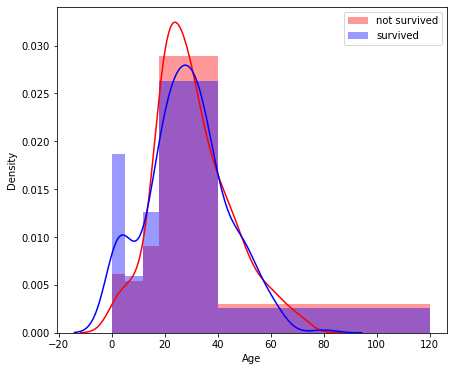

In [5]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived == 0], bins=[0,5,12,18,40,120], color="r", label="not survived")
sns.distplot(df.Age[df.Survived == 1], bins=[0,5,12,18,40,120], color="b", label="survived")
plt.legend()

# menganalisa perbandingan umur dan survived, lebih banyak balita yang selamat dari titanic berdasarkan data

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


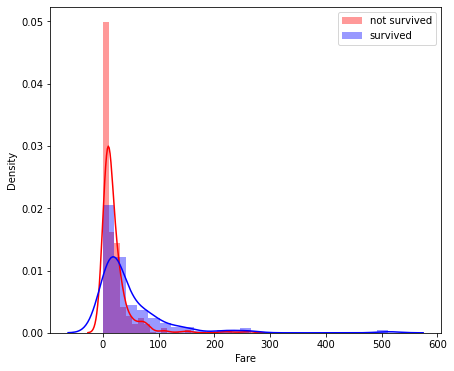

In [6]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survived")
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="b", label="survived")
plt.legend()

# menganalisa perbandingan harga dan survived, lebih banyak yang membeli tiket dengan harga mahal yang selamat 

# Categoric/Ordinal vs Target

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

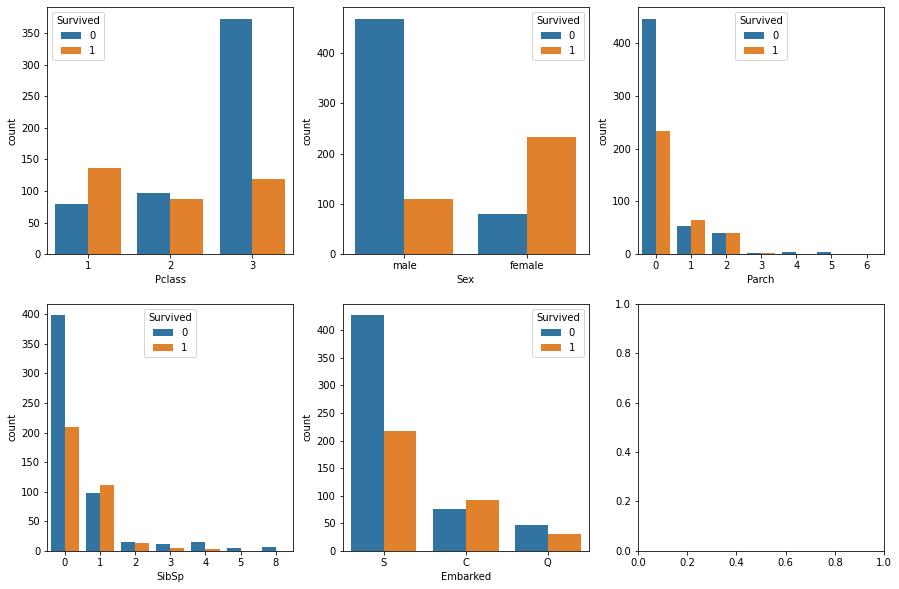

In [9]:
cat_var =["Pclass","Sex","Parch","SibSp","Embarked"]

fig, axes = plt.subplots(2,3, figsize=(15,10))

for cat, ax in zip(cat_var, axes.flatten()):
  # print(cat, ax)
  sns.countplot(cat, data=df, hue="Survived", ax=ax)

***Pandas Crosstab (Optional)***

In [10]:
pd.crosstab(df.Pclass, df.Survived, normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


# ***Feature Engineering***

Menambahkan Feature -> isAlone (apakah penumpang titanic ini sendirian?)

In [11]:
# menambahkan kolom isAlone
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


## Binning

In [12]:
df.Age = pd.cut(df.Age, [0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])

In [15]:
df.head(22)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True
6,0,3,male,NaN,0,0,8.4583,Q,True
7,0,1,male,lansia,0,0,51.8625,S,True
8,0,3,male,balita,3,1,21.0750,S,False
9,1,3,female,dewasa,0,2,11.1333,S,False


## Fare

In [17]:
df.Fare = pd.cut(df.Fare, [0,25,100,600], labels=["ekonomi","bisnis","eksekutif"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,ekonomi,S,False
2,1,1,female,dewasa,1,0,bisnis,C,False
3,1,3,female,dewasa,0,0,ekonomi,S,True
4,1,1,female,dewasa,1,0,bisnis,S,False
5,0,3,male,dewasa,0,0,ekonomi,S,True


# ***Dataset Splitting***

In [33]:

# Dataset Splitting
X = df.drop(columns="Survived") 
y = df.Survived 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

# ***Preprocessor***

In [27]:
from jcopml.pipeline import num_pipe, cat_pipe

In [48]:

# preprocessor, Pipeline, Parameter Tuning, Evaluation

# numerical_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", MinMaxScaler())
# ])

# categorical_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder())
# ])

preprocessor = ColumnTransformer([
    ("numerical", num_pipe(scaling="minmax"), ["SibSp", "Parch","isAlone"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Pclass", "Sex","Embarked", "Fare", "Age"])
])


# ***Training***

In [30]:
from jcopml.tuning import grid_search_params as gsp

In [41]:
# Param tuning recomendation
gsp.knn_params


{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [49]:

# Pipeline
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

# Parameter Tuning
# Customgrid
# parameter = {
#     "algo__n_neighbors": range(1, 51, 2),
#     "algo__weights": ["uniform", "distance"],
#     "algo__p": [1,2]
# }

# sama dengan 
# gsp.knn_params

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 7, 'algo__p': 1, 'algo__weights': 'uniform'}
0.8469101123595506 0.7653631284916201
